In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def showRegressionLine(x, y, pred_m, pred_n):
    y_pred = pred_m * x + pred_n
    plt.scatter(x, y)
    plt.plot(x, y_pred, c='red')
    plt.show()

In [11]:
def testRegressionLine(num_samples, random_seed = 1234, iterations = 100):
    print('testRegressionLine', num_samples, random_seed, iterations)
    np.random.seed(random_seed)
    x_data = np.linspace(0, 10, num_samples)
    y_labels = 2 * x_data + np.random.normal(loc=0, scale=2, size=num_samples)
    # y = m * x + n
    n_rand, m_rand = np.random.normal(size=2)
    n = tf.Variable(n_rand, dtype=tf.float64)
    m = tf.Variable(m_rand, dtype=tf.float64)
    # Squared errors
    error = 0
    for (x, y) in zip(x_data, y_labels):
        y_hat = m * x + n
        error += (y_hat - y)**2
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train = optimizer.minimize(error)
    
    
    # y_hat = m * x_data + n
    # mse = tf.squared_difference(y_hat, y_labels)
    # train = optimizer.minimize(mse)
    
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(iterations):
            sess.run(train)
        pred_m, pred_n = sess.run([m, n])
    showRegressionLine(x_data, y_labels, pred_m, pred_n)
    print('y = ' + str(pred_m) + ' * x + ' + str(pred_n))
    print('\n')

testRegressionLine 30 1234 1000


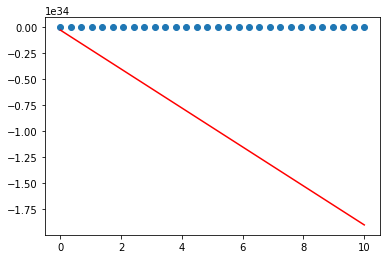

y = -1.87118631754e+33 * x + -2.78028612825e+32




In [15]:
testRegressionLine(num_samples=30, iterations = 1000)
# for i in range(1, 10):
    # testRegressionLine(num_samples=30, iterations = i)
# for i in range(10, 10, 10):
    # testRegressionLine(num_samples=i, iterations = 10)